<h1 align="center">Laboratorio: <span style="font-weight:normal">Eliminación de anomalías de la Imagen (Ecualización de Histogramas)</span></h1>

In [1]:
from PIL import Image, ImageOps

import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Visualizar_Histograma(listado_de_imagenes: list):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    for i, ax in enumerate(axs.flatten()):
        imagen_scala_grises = ImageOps.grayscale(listado_de_imagenes[i].get("imagen"))
        imagen_scala_grises.thumbnail((400, 400))
        frecuencia = imagen_scala_grises.histogram()
        indice = np.arange(256)
        plt.sca(ax)
        plt.bar(x=indice, height=frecuencia)
        plt.title(listado_de_imagenes[i].get("titulo"))
    plt.suptitle('Histogramas de las Imágenes')
    plt.show()

In [3]:
def Ecualizar_Histograma(imagen_path):
    # Carga la imagen para procesar
    imagen_original = Image.open(imagen_path)
    imagen_scala_grises = ImageOps.grayscale(imagen_original)

    # Obtener las frecuencias de los histogramas de la imagen
    histograma_imagen = imagen_scala_grises.histogram()

    # Generación de un nuevo listado de histogramas
    nuevo_histograma = [0] * len(histograma_imagen)
    nuevo_histograma[0] = histograma_imagen[0]
    for i in range(1, len(histograma_imagen)):
        nuevo_histograma[i] = nuevo_histograma[i - 1] + histograma_imagen[i]

    # Aplicación de reglas matemáticas en el nuevo histograma obtenido en el paso anterior
    x = 255 / (imagen_scala_grises.width * imagen_scala_grises.height)
    hist_con_reglas_mat = []
    for i in range(0, len(nuevo_histograma)):
        hist_con_reglas_mat.append(x * (nuevo_histograma[i]))

    # Al histograma con las nuevas reglas se aplica una función matemática floor para convertir el valor x a un valor entero aproximado al valor más bajo
    histograma_procesada = []
    for i in range(len(hist_con_reglas_mat)):
        histograma_procesada.append(math.floor(hist_con_reglas_mat[i]))

    # Obteniendo el histograma final y se procede a convertir a la imagen final procesada
    imagen_aplicada_ecualizacion = np.interp(imagen_scala_grises, range(0, 256), histograma_procesada)
    imagen_procesada = Image.fromarray(imagen_aplicada_ecualizacion)

    # Imagen procesada mediante una función de la librería PIL
    imagen_procesada_pil = ImageOps.equalize(imagen_original)

    # Registrando imágenes en una lista
    dict_imagen_original = dict(imagen=imagen_original, titulo="Imagen Original")
    dict_imagen_procesada = dict(imagen=imagen_procesada, titulo="Imagen Procesada")
    dict_imagen_procesada_pil = dict(imagen=imagen_procesada_pil, titulo="Imagen Procesada - Uso de PIL")

    listado_de_imagenes = [dict_imagen_procesada, dict_imagen_original, dict_imagen_procesada_pil]

    # Visualizar en un plot mediante la librería de matplotlib
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    for i, ax in enumerate(axs.flatten()):
        plt.sca(ax)
        plt.imshow(listado_de_imagenes[i].get("imagen"))
        plt.title(listado_de_imagenes[i].get("titulo"))
    plt.suptitle('Ecualización de Histogramas')
    plt.show()

    # Visualización del histograma
    Visualizar_Histograma(listado_de_imagenes)

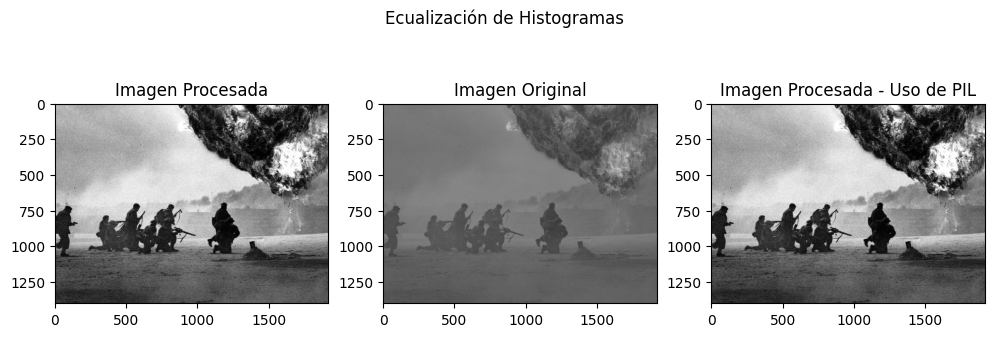

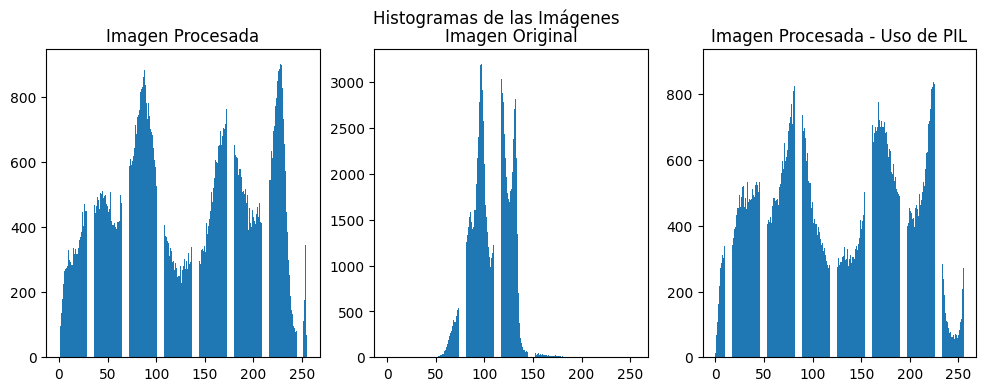

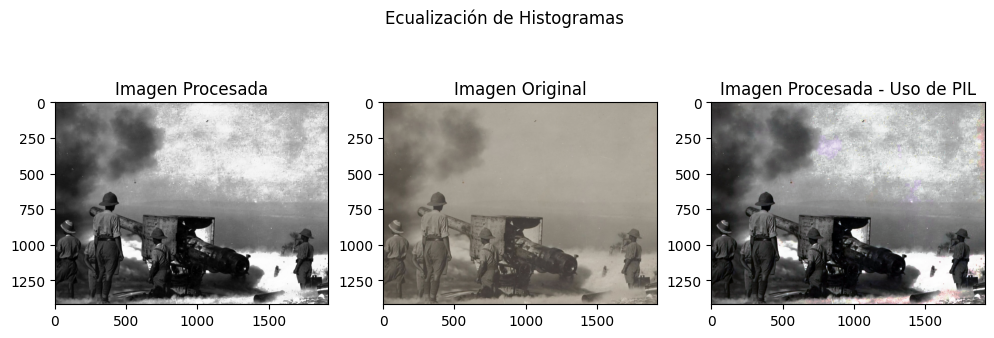

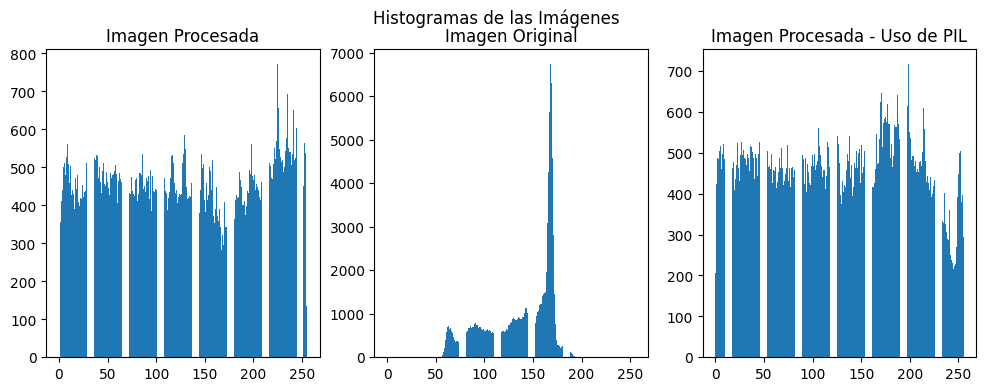

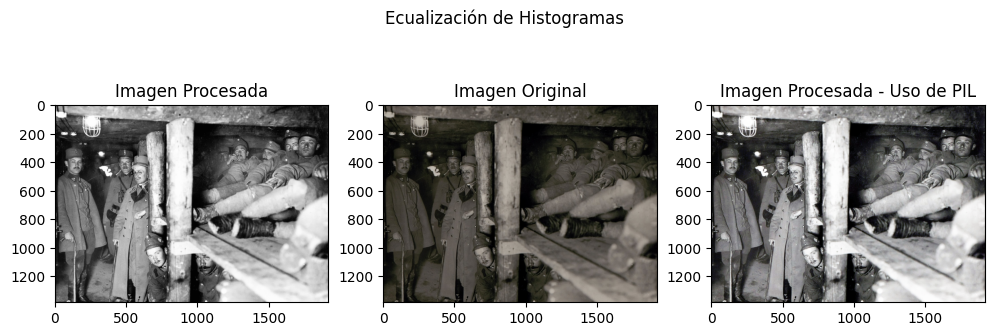

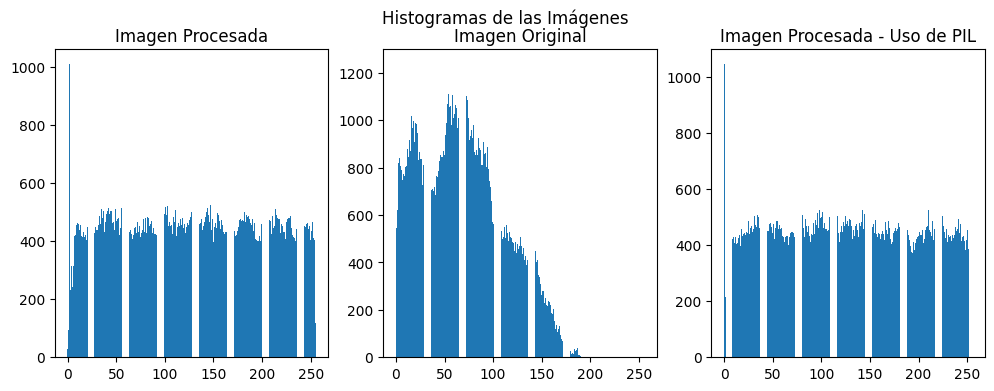

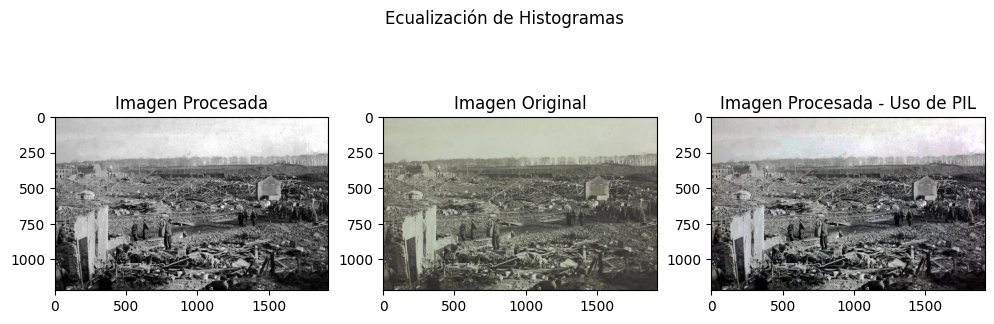

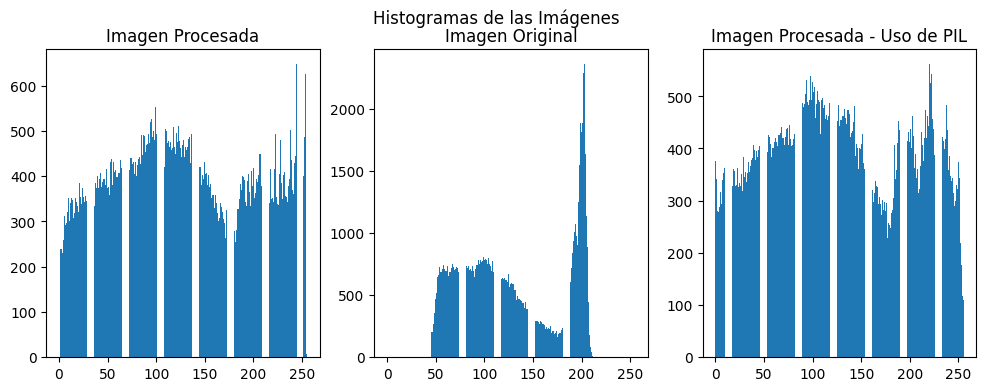

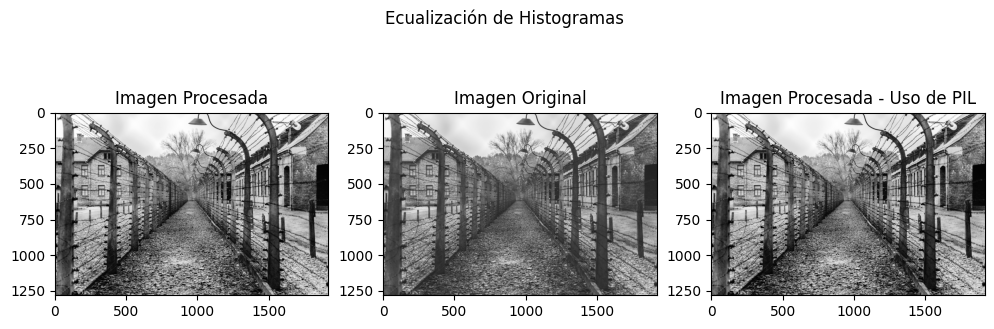

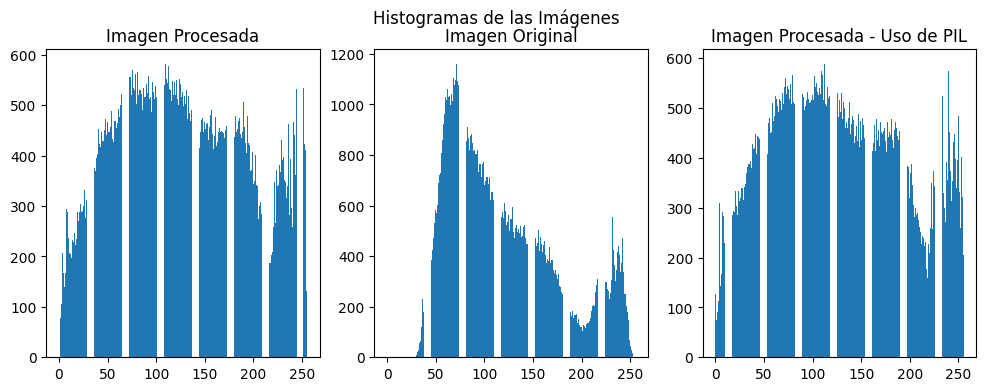

In [4]:
Ecualizar_Histograma("img-hist/wwi-1.jpg")
Ecualizar_Histograma("img-hist/wwi-2.jpg")
Ecualizar_Histograma("img-hist/wwi-3.jpg")
Ecualizar_Histograma("img-hist/wwi-4.jpg")
Ecualizar_Histograma("img-hist/wwi-5.jpg")